# Fund25. Regularization
**Regularization** : 정칙화라고 불리며, 오버피팅을 해결하기 위한 방법 중 하나다. L1, L2 Regularization, Dropout, Batch normalization 등이 있다. 
- Regularization 기법들은 모델이 train set의 정답을 잘 맞히지 못하도록 오버피팅을 방해(train loss 증가)하는 역할을 한다.  

**Normalization** : 정규화라고 불리며, 데이터의 형태를 좀 더 의미있게, 혹은 트레이닝에 적합하게 전처리하는 과정이다. 
- 데이터를 z-score로 바꾸거나 minmax scaler를 사용해 0과 1사이의 값으로 분포를 조정하는 것들이 해당된다. 
- Normalization은 모든 피처의 분포 범위를 동일하게 해 모델이 풀어야하는 문제를 좀 더 간단하게 바꿔주는 전처리 과정이다.  

>Regularization은 오버피팅을 막고자 하는 방법, Normalization은 train 시 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정이다. 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어 있는 target 데이터를 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꾼다. 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'
    
target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침 길이)를 Y로 두고 print
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a] == 'virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a] == 'virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


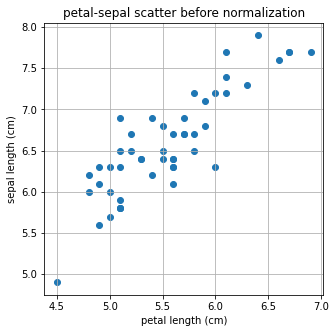

In [3]:
# 산점도로 시각화. 아직 Normalization을 하지 않았기에 x축과 y축은 각각의 최소값과 최대값의 범위로 그려진다. 
plt.figure(figsize=(5, 5))
plt.scatter(X, Y)
plt.title('petal-sepal scatter before normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

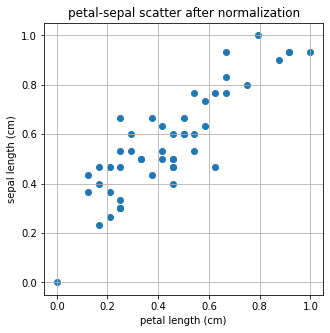

In [4]:
# 0~1로 normalization 해주는 minmax_scale을 이용해 산점도 시각화
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5, 5))
plt.scatter(X_scale, Y_scale)
plt.title('petal-sepal scatter after normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

- 결과를 비교해보면, 0\~1로 축 범위가 바뀜을 확인할 수 있다.
- 데이터의 상대적인 분포는 그대로지만, 피처의 스케일이 변환되었기에 X, Y의 관계를 다루기 용이해졌다. 

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습
linear = LinearRegression()
linear.fit(X.reshape(-1, 1), Y)

# Linear Regression의 기울기와 절편을 확인
a, b = linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" % (a, b))

기울기 : 1.00, 절편 : 1.06


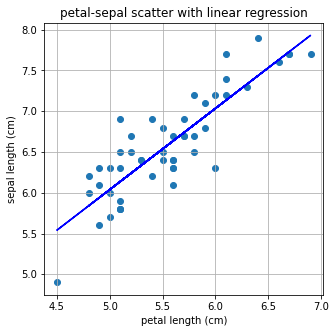

In [6]:
# Linear Regression으로 구한 기울기와 절편으로 일차함수를 만들어 산점도와 함께 시각화
plt.figure(figsize=(5, 5))
plt.scatter(X, Y)
plt.plot(X, linear.predict(X.reshape(-1, 1)), '-b')
plt.title('petal-sepal scatter with linear regression')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


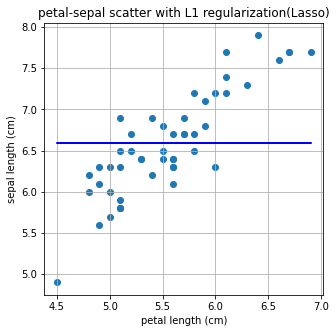

In [7]:
# L1 regularization인 Lasso로 Regression
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1, 1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5, 5))
plt.scatter(X, Y)
plt.plot(X, L1.predict(X.reshape(-1, 1)), '-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

- 기울기가 0으로 나왔다. `Lasso` 방법은 문제를 잘 풀어내지 못하는 것 같다. 

기울기 : 0.93, 절편 : 1.41


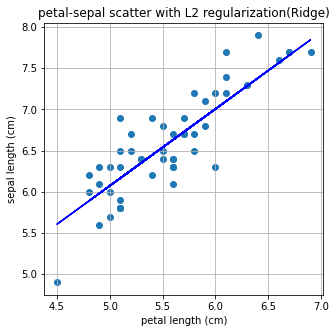

In [8]:
# L2 regularization인 Ridge로 Regression
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1, 1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

- Linear Regression이 L2 Norm과 관련이 있다. 따라서 L2 Regularization을 쓰는 `Ridge` 방법으로는 Linear Regression과 큰 차이가 없다. 
- 그렇다면 L1 Regularization을 쓰는 `Lasso`에서는 왜 답이 나오지 않았을까?

## L1 Regularization
>Lp norm : norm은 벡터나 행렬, 함수 등의 거리를 나타내는 것으로 여기서는 벡터값만 다룰 예정이다.  

$p = 1$이기 때문에 L1 Regularization이라고 부른다. 하지만 사이킷런이나 케라스, 텐서플로우 등의 패키지에서는 `Lasso`라는 이름을 더 자주 사용한다. 
- $p = 1$인 경우 X가 1차원 값인 선형회귀분석 같은 경우에는 L1 Regularization이 의미가 없다는 것을 말한다. 
- 따라서, **L1 Regularization을 사용할 때는 X가 2차원 이상인 여러 컬럼 값이 있는 데이터일 때 실제 효과를 볼 수 있다.**  

In [9]:
# 컬럼 수가 많은 데이터에서의 L1 Regularization 비교
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [10]:
# 먼저 Linear Regerssion으로 문제를 풀고 그 계수와 절대 오차, 제곱 오차, 평균 제곱값 오차를 출력
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

model.predict(X_test)
pred = model.predict(X_test)

print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [11]:
# L1 Regularization으로 문제 해결
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

L1 = Lasso(alpha = 0.05)
L1.fit(X_train, y_train)

pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


- coefficient 부분을 보면 Linear Regression과 L1 Regularization의 차이가 좀 더 두드러진다. 
- Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하지만, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지 값이 모두 0이다. 
- Error부분에서는 큰 차이가 없었지만, 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있다. 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있다. 
- 다만 Linear Regression과 L1, L2 Regularization의 차이 중 하나는 alpha라는 하이퍼파라미터가 하나 더 들어가고, 그 값에 따라 error에 영향을 미친다. 

## L2 Regularization
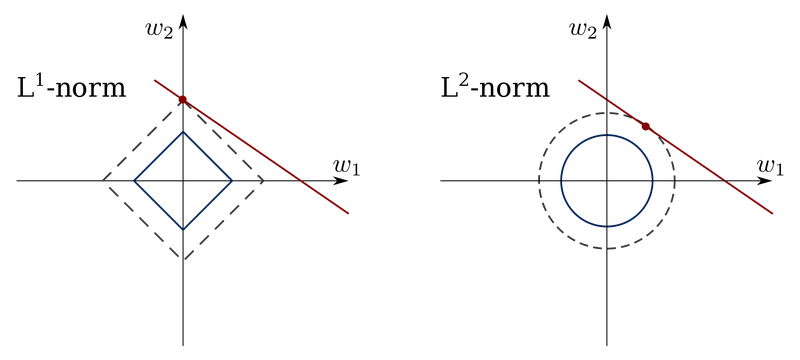  
[https://en.wikipedia.org/wiki/Lasso_(statistics)]

- Lasso는 마름모 형태의 제약조건이 생긴다. Lasso에서는 몇 개의 축에서 beta값을 0으로 보낸다. 앞에서 coefficient를 비교하면서 확인해보았다. 
- Ridge는 beta 제곱이므로 원의 형태로 나타난다. 그러므로 0에 가지는 않고 0에 가갑게 감을 확인할 수 있다. 또한 제곱이 있기 때문에 절댓값으로 L1 Norm을 쓰는 Lasso보다는 수렴이 빠르다는 장점이 있다. 이전의 같은 문제에서 iteration을 제약조건으로 주고 실험해보자. 

In [12]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)

In [13]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [14]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


- iteration 값이 5일 때, L2 Regularization의 문제는 Linear Regression과 같은 값이 나오지만, L1 Regularization에서는 앞 step과 같은 값을 확인할 수 없다. 심지어 아직 수렴하지 않았다는 경고도 나온다. 
- L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징이고, L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있어 수렴 속도가 빠르다는 장점이 있다. 
- 따라서 데이터에 따라 적절한 Regularization 방법을 활용하는 것이 좋다. 

## Lp norm
### vector norm

In [15]:
x = np.array([1, 10, 1, 1, 1])
p = 5
norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f " % norm_x)
print("result of making norm : %0.5f " % making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [16]:
# p가 무한대인 infinity norm의 경우 가장 큰 숫자를 출력
norm_x = np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f " % norm_x)

result of infinite norm : 10.00000 


### matrix norm
- 행렬의 norm의 경우는 벡터와 조금 다르며, 주로 p = 1이거나 무한대인 경우만 알면 된다. 
- p = 1인 경우에는 컬럼의 합이 가장 큰 값이 출력되고, p가 무한대인 경우 로우의 합이 가장 큰 값이 출력된다. 

In [17]:
A = np.array([[1, 2, 3], [1, 2, 3], [4, 6, 8]])
inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A : ", inf_norm_A)
one_norm_A = np.linalg.norm(A, ord=1)
print("result one norm of A : ", one_norm_A)

result inf norm of A :  18.0
result one norm of A :  14.0


## Dropout
- 드롭아웃 기법이 나오기 전의 신경망은 fully connected architecture로 모든 뉴런들이 연결되어 있었다. 
- 그러나 드롭아웃이 나오면서 확률적으로 랜덤하게 몇 가지의 뉴럴만 선택하여 정보를 전달하는 과정이다. 
- 드롭아웃은 오버피팅을 막는 Regularization layer 중 하나다. 확률을 너무 높이면, 제대로 전달되지 않으므로 학습이 잘 되지 않고, 확률을 너무 낮추는 경우에는 fully connected layer와 같다. 

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [19]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
# dropout의 확률을 0.9로 설정
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3644 - accuracy: 0.4701
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1367 - accuracy: 0.5444
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0792 - accuracy: 0.5681
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0549 - accuracy: 0.5738
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0318 - accuracy: 0.5875


In [21]:
# dropout이 없을 때 실습을 하면, 5 epoch만으로도 충분히 높은 정확도를 볼 수 있다. 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4943 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3740 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8902


In [22]:
# overfitting을 유발하기 위해 train:valid = 99:1로 split 후 loss function의 값을 그려보고, fully connected layer를 만들어보자. 
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.0526 - accuracy: 0.5089 - val_loss: 1.6534 - val_accuracy: 0.6117
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4139 - accuracy: 0.6219 - val_loss: 1.1929 - val_accuracy: 0.6633
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0889 - accuracy: 0.6747 - val_loss: 0.9687 - val_accuracy: 0.7267
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9072 - accuracy: 0.7147 - val_loss: 0.8248 - val_accuracy: 0.7633
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7978 - accuracy: 0.7342 - val_loss: 0.7452 - val_accuracy: 0.7700
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.7463 - val_loss: 0.6928 - val_accuracy: 0.7833
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.7571 - val_loss: 0.6563 - val_accuracy: 0.7800

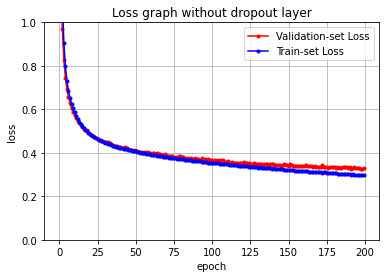

In [23]:
# loss 값 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Validation-set Loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Train-set Loss')
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer')
plt.ylim(0, 1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

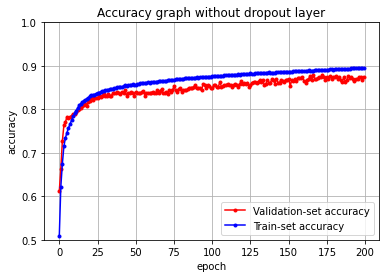

In [24]:
# accuracy 값 시각화
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- dropout layer가 없는 fully connected layer에서 200번 학습하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌다. 
- 그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있다. 
- 이렇게 임의적으로 오버피팅을 만든 환경에서 dropout layer를 추가한 뒤 실험해보자. 

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 3ms/step - loss: 2.0801 - accuracy: 0.4769 - val_loss: 1.7023 - val_accuracy: 0.5500
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4783 - accuracy: 0.5494 - val_loss: 1.2377 - val_accuracy: 0.6550
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1758 - accuracy: 0.6152 - val_loss: 1.0275 - val_accuracy: 0.7017
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0124 - accuracy: 0.6607 - val_loss: 0.8967 - val_accuracy: 0.7433
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9051 - accuracy: 0.6932 - val_loss: 0.8061 - val_accuracy: 0.7633
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8353 - accuracy: 0.7107 - val_loss: 0.7428 - val_accuracy: 0.7667
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7848 - accuracy: 0.7232 - val_loss: 0.7020 - val_accuracy: 0.7717

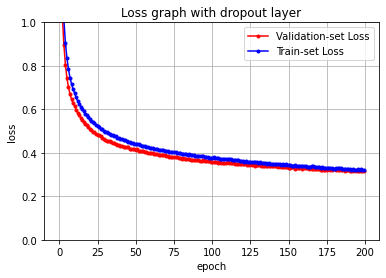

In [26]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

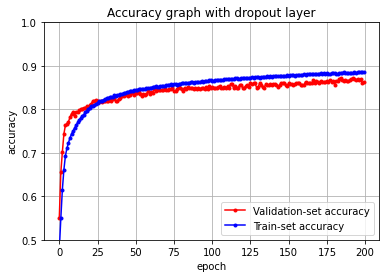

In [27]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 좋은 데이터로 임의로 오버피팅을 유도한 것이 좀 억지스럽지만, Dropout layer 하나만으로 오버피팅을 막고, 두 데이터셋이 정확도도 비슷하게 나옴을 확인했다. 
- 더 복잡한 네트워크나, 더 어려운 데이터의 경우 오버피팅이 자주 있는 일이기 때문에, dropout layer를 추가하는 경우가 많다. 
- 이 또한 확률 값이 파라미터로 들어가기에, 어떤 값을 선택하는지는 데이터와 네트워크에 따라 다르다. 

## Batch Normalization
- Batch Normalization은 gradient vanishing, explode 문제를 해결하는 방법이다.
- 논문 알고리즘의 수식에서 normalize 분모에 ϵ가 추가되었다는 점이 중요한데, 이로 인해 normalize 과정에서 gradient가 사라지거나 폭등하는 것을 막을 수 있다. 
- 기존의 z-score로 normalize하는 과정과 같지만, 이 부분을 추가하는 것만으로도 오버피팅이나 학습이 잘 되지 않는 것을 막을 수 있게 된다.  

단순 fully connected layer와 Batch Normalization layer를 추가한 실험을 비교해보자. 정확도 비교와 속도의 차이에 중점을 두자. 

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [29]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 26ms/step - loss: 1.2077 - accuracy: 0.6165 - val_loss: 0.7428 - val_accuracy: 0.7436
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.7816 - val_loss: 0.5878 - val_accuracy: 0.8043
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5484 - accuracy: 0.8168 - val_loss: 0.5267 - val_accuracy: 0.8218
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.8315 - val_loss: 0.4980 - val_accuracy: 0.8314
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4748 - accuracy: 0.8400 - val_loss: 0.4791 - val_accuracy: 0.8371
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4558 - accuracy: 0.8438 - val_loss: 0.4596 - val_accuracy: 0.8429
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8505 - val_loss: 0.4463 - val_accuracy: 0.8473
Epoch 8/20
21/21 [=

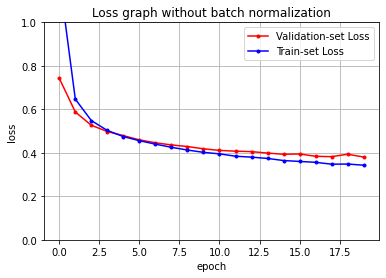

In [31]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

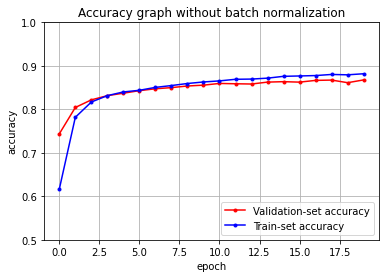

In [32]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 이제 Batch Normalization layer를 추가해보자. 

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 18ms/step - loss: 0.9686 - accuracy: 0.6774 - val_loss: 1.1270 - val_accuracy: 0.6317
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5287 - accuracy: 0.8210 - val_loss: 0.8752 - val_accuracy: 0.7403
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4654 - accuracy: 0.8415 - val_loss: 0.7496 - val_accuracy: 0.7967
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4279 - accuracy: 0.8527 - val_loss: 0.6836 - val_accuracy: 0.8148
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4007 - accuracy: 0.8612 - val_loss: 0.6178 - val_accuracy: 0.8350
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3787 - accuracy: 0.8696 - val_loss: 0.5863 - val_accuracy: 0.8384
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3605 - accuracy: 0.8760 - val_loss: 0.5428 - val_accuracy: 0.8515
Epoch 8/20
21/21 [=

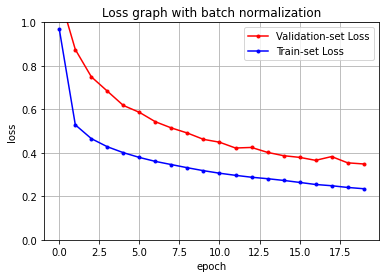

In [34]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

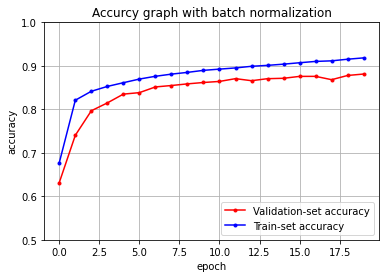

In [35]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 기존의 fully connected layer도 낮지 않은 결과를 보이나, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있었다. 
- 또한 loss 함수의 감소도 더 빨라짐을 볼 수 있다. 즉, Batch Normalization을 통해 이미지가 정규화되면서 좀 더 고른 분포를 가지며, ϵ로 인해 안정적인 학습이 가능해진다. 

## 회고
- Regularization은 CS231n이나 다른 노드를 공부하면서 꽤나 접했던 개념인데, 아직까지 명확하게 머릿속에 정리되어 있지는 않았던 것 같다. 
- 특히 L1, L2 norm에 대해 이전보다는 조금 더 이해도가 높아진 것 같다. 고등학교 때 잠깐 접했던 택시기하랑 연관이 있었다니...
- Batch Normalization 부분은 CS231n 강의 정리를 못해서 아직 어렴풋이 이해한 것 같아 다른 자료도 더 찾아보고 공부해야 할 것 같다. 